In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import librosa

In [3]:
y,sr=librosa.load("/content/1.wav")

In [21]:
with open('1.txt') as f:
    references = f.readlines()

In [22]:
references

['you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is detroit']

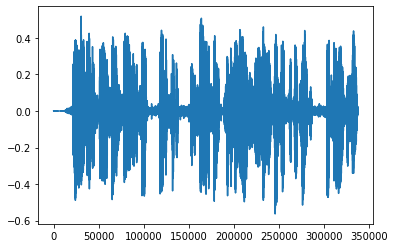

In [4]:
plt.plot(y)

In [5]:
sr

22050

In [6]:
hop_length = 512
spectrogram = np.abs(librosa.stft(y))
melspectrogram= librosa.feature.melspectrogram(y=y, sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
mfcc_delta = librosa.feature.delta(mfcc)

In [7]:
import librosa.display

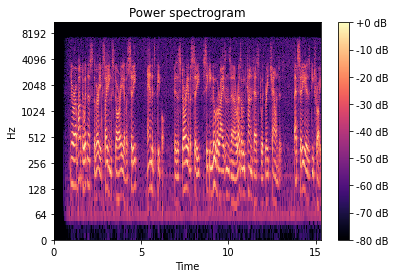

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

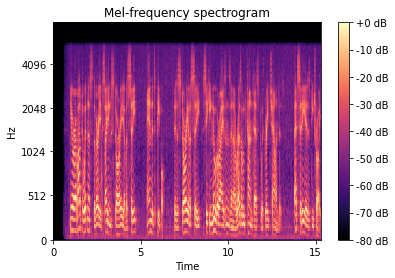

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspectrogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'MFCC')]

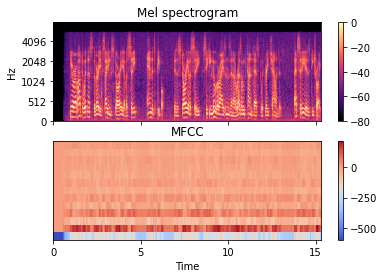

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [ ]:
!pip install audiomentations

In [14]:
!pip install pyloudnorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, LoudnessNormalization
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
    LoudnessNormalization()
])
augmented_y = augment(samples=y, sample_rate=sr)

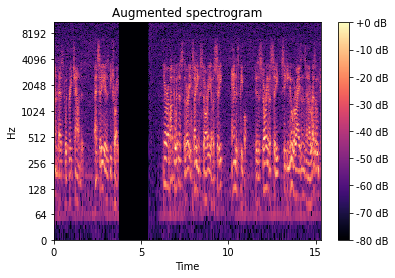

In [16]:
augmented_spectrogram = np.abs(librosa.stft(augmented_y))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(augmented_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Augmented spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
!pip install evaluate

In [ ]:
!pip install Cython
!pip install nemo_toolkit[all]

In [ ]:
!pip install hydra-core

In [ ]:
import nemo
# Import Speech Recognition collection
import nemo.collections.asr as nemo_asr
# Import Natural Language Processing colleciton
import nemo.collections.nlp as nemo_nlp
# Import Speech Synthesis collection
import nemo.collections.tts as nemo_tts

In [ ]:
asr_model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained(model_name="stt_en_conformer_ctc_medium")

In [34]:
t=asr_model.transcribe(paths2audio_files=["/content/1.wav"], batch_size=32, logprobs=False)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
from evaluate import load
wer = load("wer")
wer_score = wer.compute(predictions=t, references=references)

In [38]:
print(references)
print(t)

['you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is detroit']
['you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is deit']


In [36]:
print(wer_score)

0.027777777777777776
